## 0. Install and Import Dependencies

In [ ]:
# MPS acceleration is available on MacOS 12.3+
!pip3 install torch torchvision torchaudio

In [ ]:
#Install pytorch
#https://pytorch.org/get-started/locally/
# Install easyocr
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 35.3 MB/s eta 0:00:00


In [ ]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

## 1. Read in images or video

In [ ]:
IMAGE_PATH = '/F1003AP_1fd739e1-f22f-4d28-aae1-ad991603f53b.png'
#IMAGE_PATH = 'surf.jpeg'

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH)
result

[([[168, 118], [436, 118], [436, 174], [168, 174]],
  'Fire action',
  0.8118333508424552),
 ([[199, 205], [353, 205], [353, 225], [199, 225]],
  'Sound the alarm',
  0.9586077627134448),
 ([[196, 266], [364, 266], [364, 294], [196, 294]],
  'Leave building by',
  0.9993210930358777),
 ([[196, 292], [398, 292], [398, 316], [196, 316]],
  'nearest available exit',
  0.9999678486897279),
 ([[197, 339], [434, 339], [434, 367], [197, 367]],
  'Report to assembly point',
  0.9581598298884869),
 ([[198, 420], [463, 420], [463, 450], [198, 450]],
  'Do not return to the building ',
  0.5765214442933253),
 ([[197, 447], [425, 447], [425, 467], [197, 467]],
  'until authorised to do So',
  0.7332275499648307),
 ([[199, 513], [357, 513], [357, 533], [199, 533]],
  'Do not take risks',
  0.8385393829066005)]

In [ ]:
result[2]

([[196, 266], [364, 266], [364, 294], [196, 294]],
 'Leave building by',
 0.9993210930358777)

## 2. Draw Results

In [ ]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

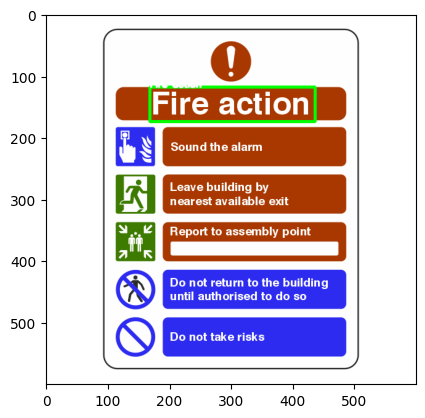

In [ ]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img = cv2.putText(img,text,top_left, font, 0.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()

## 3. Handling Multiple Lines

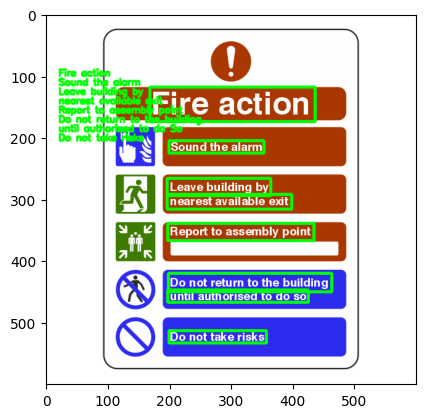

In [ ]:
img = cv2.imread(IMAGE_PATH)
spacer = 100
for detection in result:
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15

plt.imshow(img)
plt.show()